In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

### Задание 4*
В этом задании мы будем работать с датасетом, в котором приведены данные по мошенничеству с кредитными данными: Credit Card Fraud Detection (информация об авторах: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015).
Ознакомьтесь с описанием и скачайте датасет creditcard.csv с сайта Kaggle.com по ссылке:
https://www.kaggle.com/mlg-ulb/creditcardfraud
Данный датасет является примером несбалансированных данных, так как мошеннические операции с картами встречаются реже обычных.
Импортруйте библиотеку Pandas, а также используйте для графиков стиль “fivethirtyeight”.
Посчитайте с помощью метода value_counts количество наблюдений для каждого значения целевой переменной Class и примените к полученным данным метод plot, чтобы построить столбчатую диаграмму. Затем постройте такую же диаграмму, используя логарифмический масштаб.
На следующем графике постройте две гистограммы по значениям признака V1 - одну для мошеннических транзакций (Class равен 1) и другую - для обычных (Class равен 0). Подберите значение аргумента density так, чтобы по вертикали графика было расположено не число наблюдений, а плотность распределения. Число бинов должно равняться 20 для обеих гистограмм, а коэффициент alpha сделайте равным 0.5, чтобы гистограммы были полупрозрачными и не загораживали друг друга. Создайте легенду с двумя значениями: “Class 0” и “Class 1”. Гистограмма обычных транзакций должна быть серого цвета, а мошеннических - красного. Горизонтальной оси дайте название “Class”.


In [10]:
DATASET_PATH = '../../data/creditcard.csv'

In [11]:
df = pd.read_csv(DATASET_PATH)
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [17]:
opClass = df['Class'].value_counts()

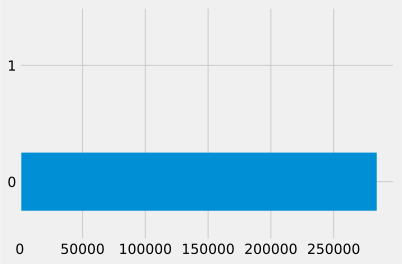

In [20]:
opClass.plot(kind='barh')
plt.show()

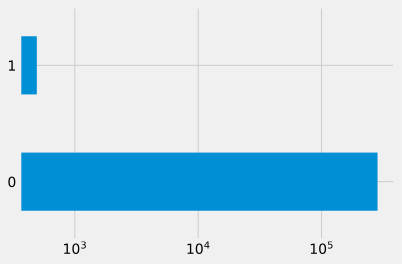

In [21]:
opClass.plot(kind='barh', logx=True)
plt.show()

In [24]:
class0 = df.loc[df['Class'] == 0, ['V1']]
class1 = df.loc[df['Class'] == 1, ['V1']]

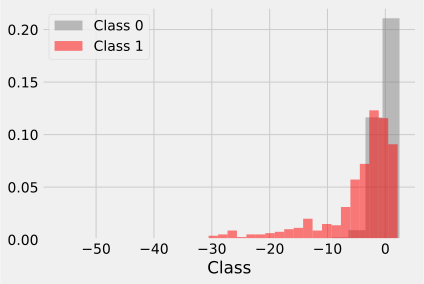

In [26]:
plt.hist(class0['V1'], bins=20, density=True, alpha=0.5, label='Class 0', color='grey')
plt.hist(class1['V1'], bins=20, density=True, alpha=0.5, label='Class 1', color='red')
plt.xlabel('Class')
plt.legend()
plt.show()